**Кластеризация данных с использованием DBSCAN**

В данном примере используется алгоритм кластеризации DBSCAN для разделения данных на группы. Проведена загрузка данных, определение оптимальных значений параметров eps и min_samples с использованием метода силуэта, обучение модели, визуализация кластеров и оценка качества кластеризации.

First 5 rows of the dataset:
[ 0.71541261 -0.49408918]
[ 0.24678948 -0.24009066]
[0.94326068 0.3467999 ]
[ 0.9737422  -0.49290076]
[ 1.2397133 -0.4114107]


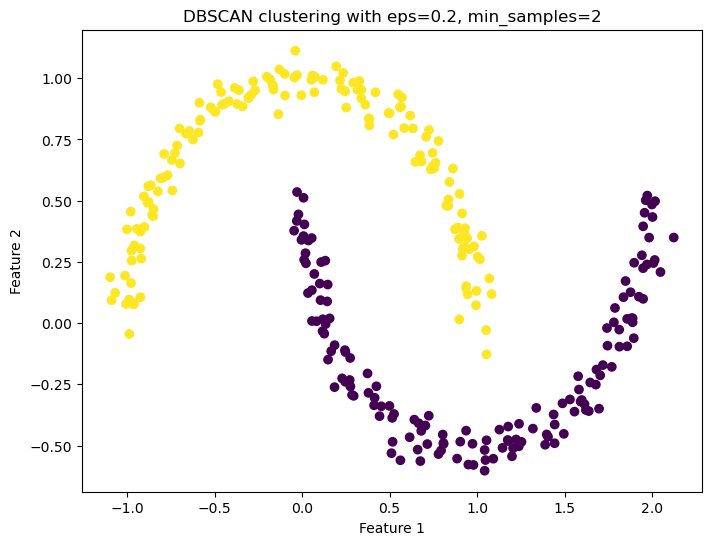

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Создание датасета с полумесяцами
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# Вывод информации о датасете
print("First 5 rows of the dataset:")
for i in range(5):
    print(X[i])

# Определение оптимальных значений параметров eps и min_samples с использованием метода силуэта
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(2, 6)
best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        if len(np.unique(dbscan.labels_)) > 1: 
            score = silhouette_score(X, dbscan.labels_)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Визуализация разбиения на кластеры для оптимального eps и min_samples
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(X)
labels = dbscan.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'DBSCAN clustering with eps={best_eps}, min_samples={best_min_samples}')
plt.show()
